Device:  cuda


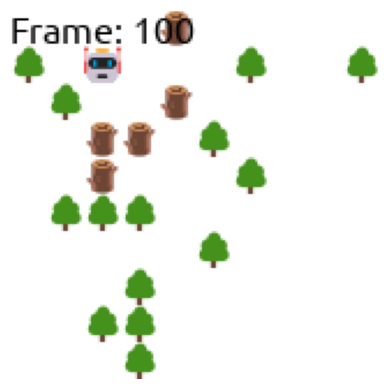

In [3]:
import torch
from gridworld.agent import Agent, LoggerAgent
from gridworld.rendering import run_simulation_with_rendering
from gridworld.exploration import ExplorationMethod, Greedy
from gridworld.tile_types import TileType
from gridworld.world import LoggerTrainingWorld
from models.ann import DeepQNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: ', device)

agent: Agent = LoggerAgent()
world = LoggerTrainingWorld()

model_filename = 'output/policy_2023-07-19_13-53.pth'
policy = DeepQNet(agent)
policy.load_state_dict(torch.load(model_filename))
policy = policy.to(device)

exploration_method: ExplorationMethod = Greedy(agent, device)
duration = run_simulation_with_rendering(policy, world, agent, device, exploration_method, file_name=f'{model_filename}.gif', frame_rate=6, max_duration=100);